In [238]:
from datetime import datetime, date
import talib as ta
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as web
from scipy import stats
import sklearn.metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from sklearn.metrics import r2_score
import seaborn as sns


Remember to run the above code as well to enable the imports.

Run the notebook below, enter the stock ticker symbol in the console that appears and press enter.

In [239]:
stock = input("Enter a stock ticker.")
userDate = input("Enter a starting date.")

data = web.DataReader(stock, data_source = "yahoo", start = userDate, end = date.today())
data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-02,39.712502,38.557499,38.722500,39.480000,148158800.0,38.105145
2019-01-03,36.430000,35.500000,35.994999,35.547501,365248800.0,34.309586
2019-01-04,37.137501,35.950001,36.132500,37.064999,234428400.0,35.774250
2019-01-07,37.207500,36.474998,37.174999,36.982498,219111200.0,35.694611
2019-01-08,37.955002,37.130001,37.389999,37.687500,164101200.0,36.375061
...,...,...,...,...,...,...
2022-11-28,146.639999,143.380005,145.139999,144.220001,69246000.0,144.220001
2022-11-29,144.809998,140.350006,144.289993,141.169998,83763800.0,141.169998
2022-11-30,148.720001,140.550003,141.399994,148.029999,111224400.0,148.029999


Basic Chart & Preferred Indicator

Indicators Avaiable:

RSI
EMA
SMA
MACD
VWAP

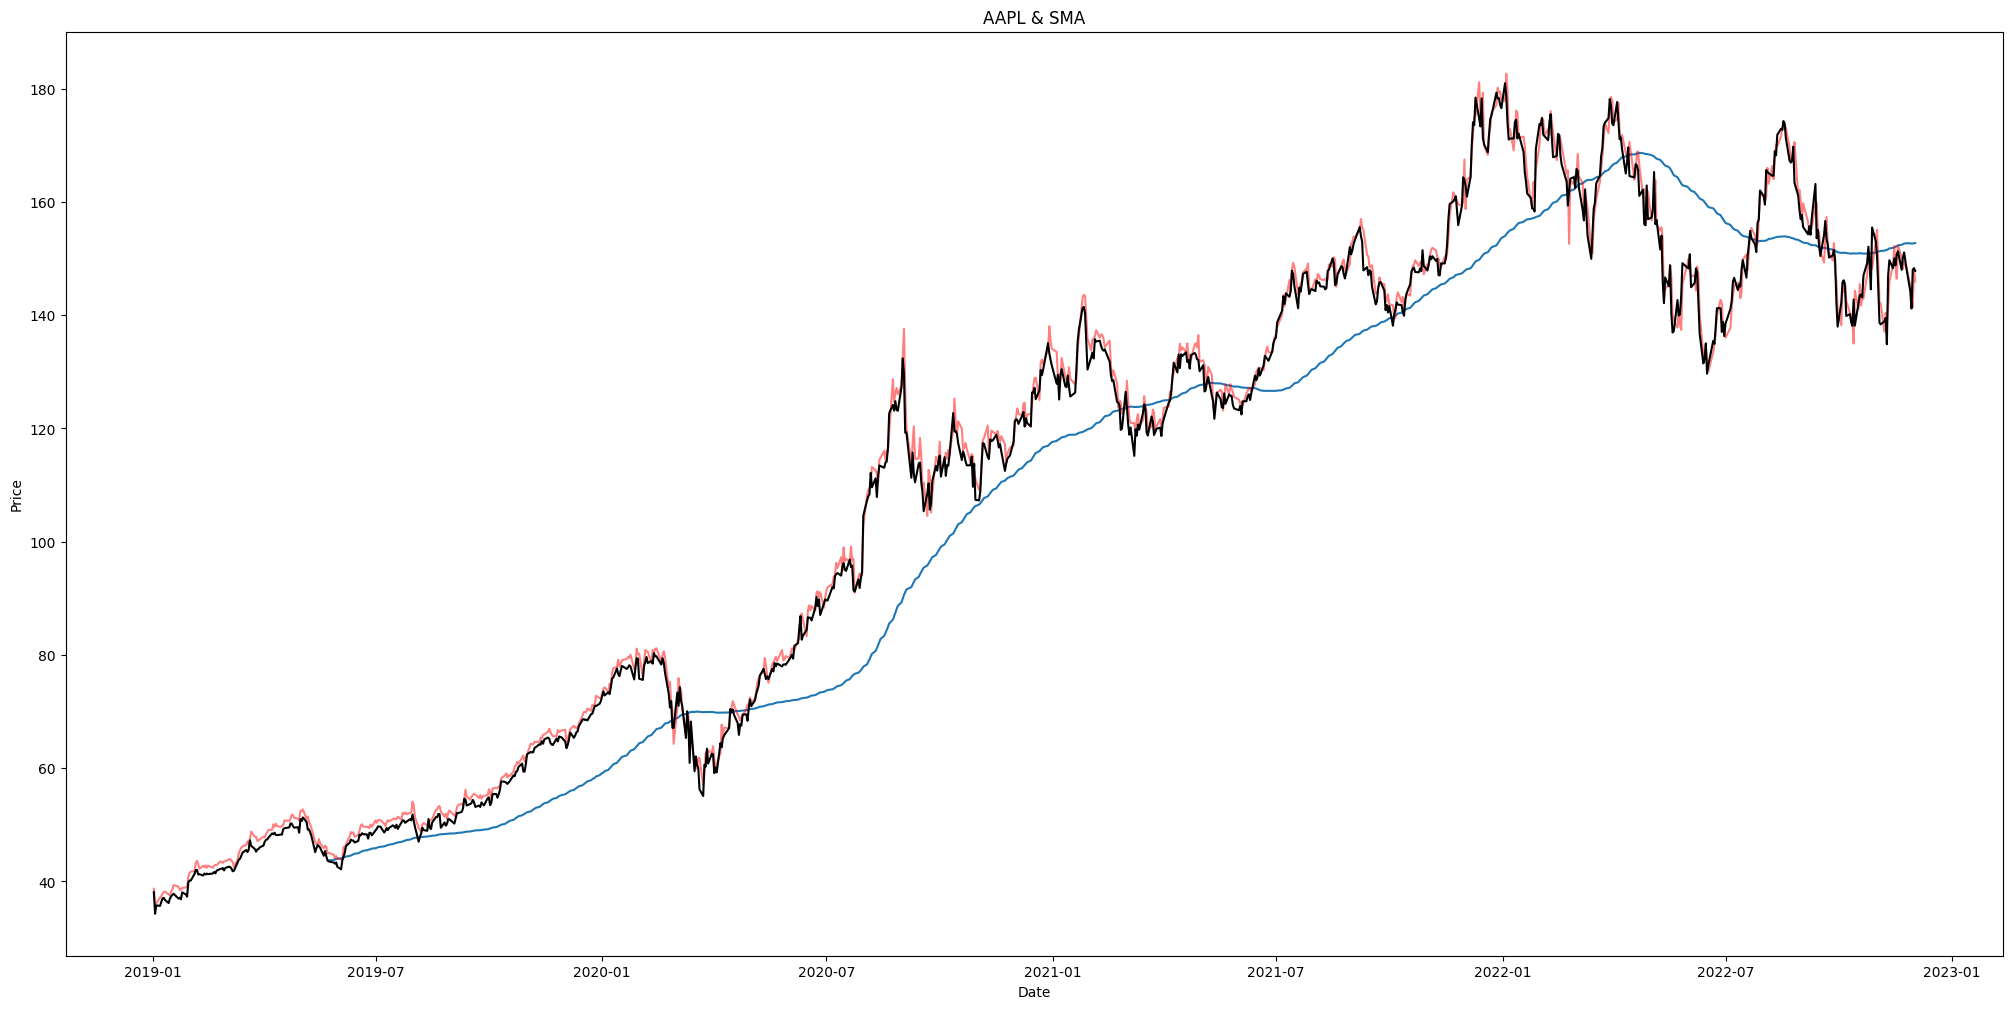

In [240]:
indicator = (input("Enter your preferred indicator."))

indicatortype = ""

#RSI
data['RSI'] = ta.RSI(data['Adj Close'], 14)

#EMA
data['EMA_50'] = ta.EMA(data['Adj Close'], 50)

#SMA_100
data['SMA_100'] = ta.SMA(data['Adj Close'], 100)

#MACD
#########
#VWAP
#########


def displaychart():
    plt.figure(figsize = (25, 12))
    plt.title(stock + " & " + indicator), 
    plt.xlabel('Date'),
    plt.ylabel('Price'),
    
    final_indicatortype = indicatortype[0].replace("", '')
    plt.plot(data[str(final_indicatortype)], label = indicatortype)
    plt.plot(data['Open'], color = 'red', alpha = 0.5)
    plt.plot(data['Adj Close'], color = 'black')
    plt.show()
    
    
if indicator == 'RSI':
    
    indicatortype = "RSI",
    displaychart()
    
if indicator == 'EMA':
    
    indicatortype = "EMA_50",
    displaychart()
      
if indicator == 'SMA':
    
    indicatortype = "SMA_100",
    displaychart()
    
if indicator == 'MACD':
    
    indicatortype = "MACD"
    displaychart()
    
if indicator == 'VWAP':
    
    indicatortype = "VWAP"
    displaychart()
    

In [241]:
#Correlation
print(".Corr values of " + stock)
data.corr()

.Corr values of AAPL


,High,Low,Open,Close,Volume,Adj Close,RSI,EMA_50,SMA_100
High,1.000000,0.999450,0.999616,0.999523,-0.311569,0.999509,-0.223753,0.985962,0.964569
Low,0.999450,1.000000,0.999525,0.999526,-0.330779,0.999488,-0.213645,0.984376,0.962877
Open,0.999616,0.999525,1.000000,0.998975,-0.319959,0.998943,-0.223273,0.985134,0.963260
Close,0.999523,0.999526,0.998975,1.000000,-0.321594,0.999970,-0.213243,0.984860,0.963578
Volume,-0.311569,-0.330779,-0.319959,-0.321594,1.000000,-0.322722,-0.068237,-0.325909,-0.360942
Adj Close,0.999509,0.999488,0.998943,0.999970,-0.322722,1.000000,-0.216057,0.985665,0.965196
RSI,-0.223753,-0.213645,-0.223273,-0.213243,-0.068237,-0.216057,1.000000,-0.348018,-0.356244
EMA_50,0.985962,0.984376,0.985134,0.984860,-0.325909,0.985665,-0.348018,1.000000,0.992319
SMA_100,0.964569,0.962877,0.963260,0.963578,-0.360942,0.965196,-0.356244,0.992319,1.000000


Linear Regression Based Prediction

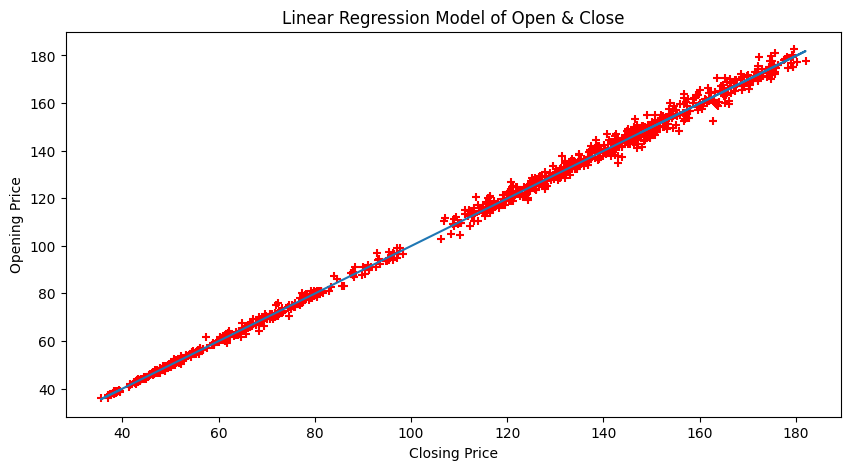

In [242]:
#linear regression of stock open & close
x = data.Close
y = data.Open

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
    return slope * x + intercept

model = list(map(myfunc, x))

plt.figure(figsize = (10, 5))
plt.title('Linear Regression Model of Open & Close')
plt.xlabel('Closing Price')
plt.ylabel('Opening Price')

plt.scatter(x, y, color = 'red', marker ='+')
plt.plot(x, model)
plt.show()


In [243]:
#calculating relationship
slope, intercept, r, p, std_err = stats.linregress(x, y)

print(r)

0.9989745023327116


In [244]:
#prediction of what the open (y) price will be according to the last closing (x) price.

slope, intercept, r, p, std_err = stats.linregress(x, y)

def mypredict(x):
    return slope * x + intercept

prediction = myfunc(data['Adj Close'][-1])

print("Predicted Next Day Opening Price:")
print(prediction)

print("Previous Closing Price:")
print(data.Close[-1])

Predicted Next Day Opening Price:
147.66938627117145
Previous Closing Price:
147.80999755859375
